# Regularization

Made by Faris | 04.05.21

[Regularization source](https://www.kaggle.com/saptarsi/variation-in-regression)

[AIC and BIC source](https://www.kaggle.com/saptarsi/variation-in-regression)

[Original made for NUJerman e.V. by Faris](https://github.com/NUJerman/NUJ-Internship-2020-Green/blob/main/Python%20Suite%202/Regression/Regularization%20FDQ/Regularization_FDQ.ipynb)

### Libraries

In [1]:
# For dataset and visualization
import numpy as np
import matplotlib.pyplot as plt

# For function
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


# Core
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# For AIC and BIC
import time
from sklearn.linear_model import LassoLarsIC
from sklearn.mixture import GaussianMixture

### Dataset

In [2]:
np.random.seed(42)
m = 36
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

Early visualization

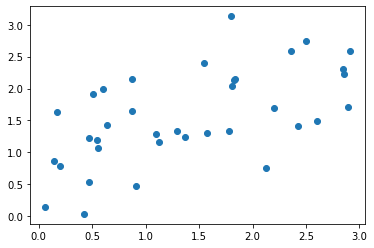

In [3]:
plt.scatter(X, y)

## Model implementation

Function for easier use

In [4]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        #rp.aic(y, y_new_regul, 3)
        #p.bic(y, y_new_regul, 3)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

### AIC and BIC selection for best fit Lambda

/home/user/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/user/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 1.0, 'Information-criterion for model selection')

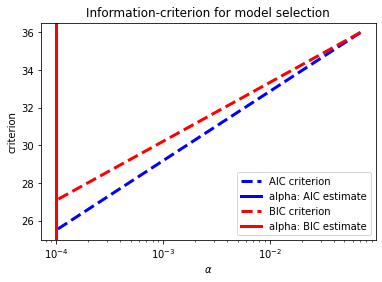

In [5]:
# Variables
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)

EPSILON = 1e-4 # This is to avoid division by zero while doing np.log10

# Function deining
def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')

# Visualization
plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection')

### Ridge

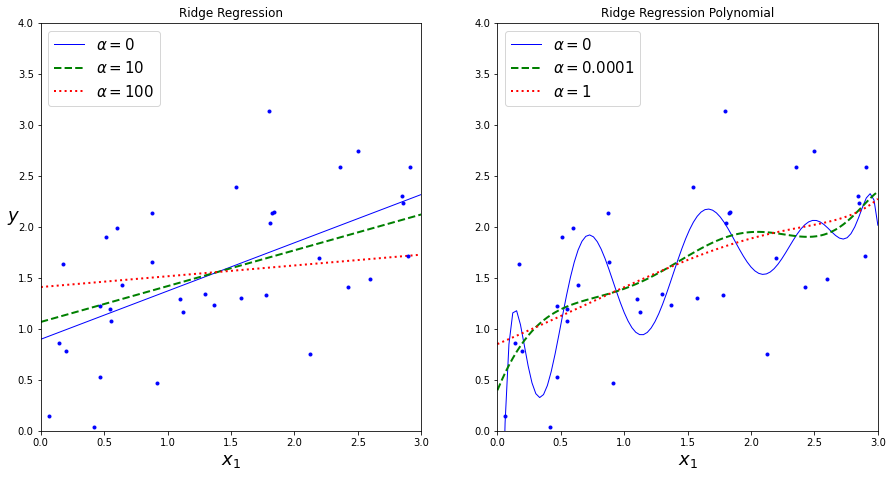

In [6]:
# Linear Regression  implementation
plt.figure(figsize=(15,7.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42) # Keycode nb: try to change the alpha / lambda
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Ridge Regression")

# Polynomial implementation
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-4, 1), tol=1, random_state=42) # Keycode nb: try to change the alpha / lambda
plt.title("Ridge Regression Polynomial")
plt.show()

### Lasso

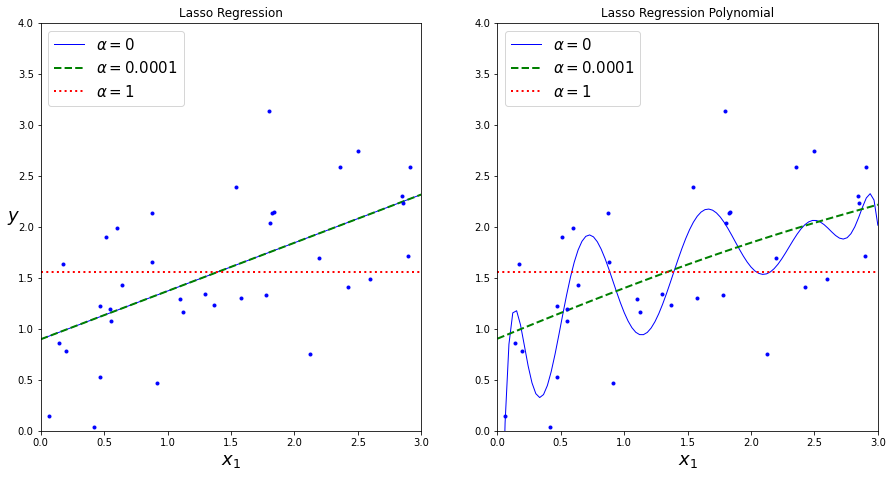

In [7]:
# Linear Regression implementation
plt.figure(figsize=(15,7.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 10**-4, 1), random_state=10) # Keycode nb: try to change the alpha / lambda
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Lasso Regression")

# Polynoial Regression implementation
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-4, 1), tol=1, random_state=42) # Keycode nb: try to change the alpha / lambda
plt.title("Lasso Regression Polynomial")
plt.show()

### Elastic-Net

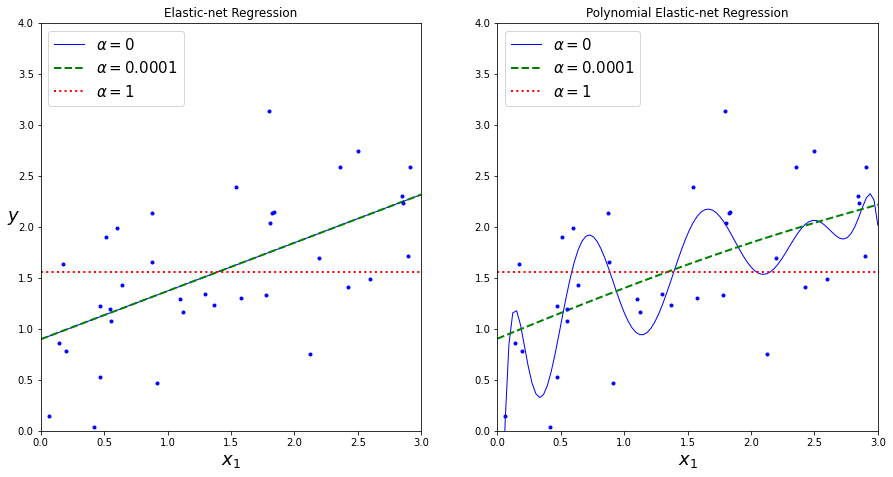

In [8]:
# Linear Regression implementation
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
plt.figure(figsize=(15,7.5))
plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 10**-4, 1), random_state=42) # Keycode nb: try to change the alpha / lambda
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Elastic-net Regression")

# Polynoial Regression implementation
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 10**-4, 1), tol=1, random_state=42) # Keycode nb: try to change the alpha / lambda
plt.title("Polynomial Elastic-net Regression")
plt.show()